# The Boston HMDA Data Set

#### Features
* dir -- debt payment to total income ratio
* hir -- house expense to income ratio
* lvr -- ratio of size of loan to assessed value of property
* ccs -- consumer credit score from 1 to 6 (a low value being a good score)
* mcs -- mortgage credit score from 1 to 4 (a low value being a good score)
* pbcr -- public bad credit score
* dmi -- denied mortagage insurance
* self -- self employed
* single -- is the applicant single
* uria -- 1989 Massachusetts unemployment rate in the applicant's industry
* condominium -- is unit a condominium
* black -- is the applicant black 
* deny -- mortgage application denied

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(
    'https://raw.githubusercontent.com/zcolley/cs381-MatthewFried/main/quiz/Hdma.csv')

df_cp = df.copy()
df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


## EDA


In [3]:
df.describe()

,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


From the above chart, It shows there are 7 numeric data. It is unclear that condominium value with low value 0 and max value 1

In [4]:
# to see type of each feature
df.dtypes


dir            float64
hir            float64
lvr            float64
ccs            float64
mcs            float64
pbcr            object
dmi             object
self            object
single          object
uria           float64
comdominiom      int64
black           object
deny            object
dtype: object

clealy it shows that there 7 numeric data and 6 categorical data

In [5]:
# find null value
df.isnull().sum()


dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

It shows there is a null value in pbcr column and self column

In [6]:
# check unique value in categorical column
columns = ['pbcr','dmi','self','single','black','deny']

for val in columns:
    print(f'column name: {val} --- {df[val].unique()}')

column name: pbcr --- ['no' 'yes' nan]
column name: dmi --- ['no' 'yes']
column name: self --- ['no' 'yes' nan]
column name: single --- ['no' 'yes']
column name: black --- ['no' 'yes']
column name: deny --- ['no' 'yes']


There is no other value other than no or yes. But there were some missing nan.

<AxesSubplot:title={'center':'Lvr'}>

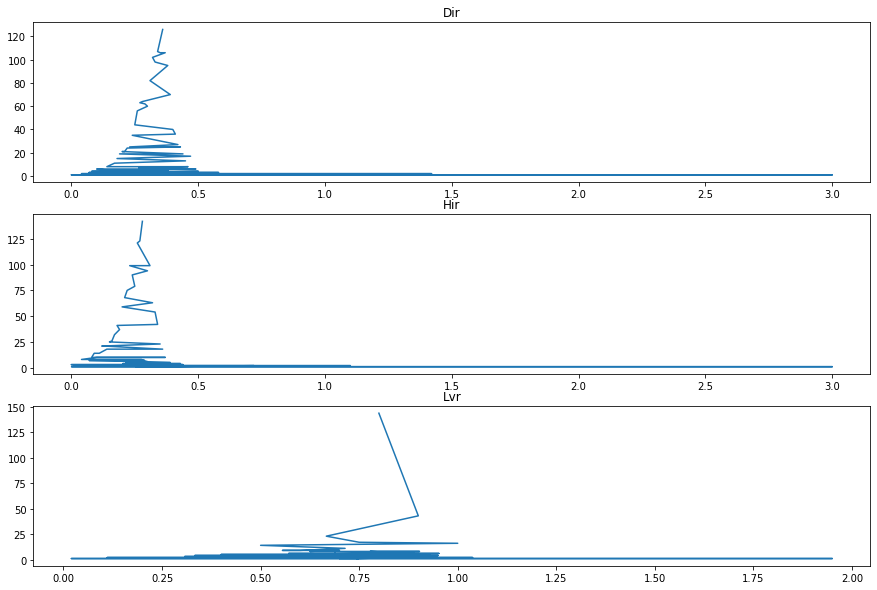

In [7]:
# to see most frequent value in dir, hir, and lvr.
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
df['dir'].value_counts().plot.line(title = 'Dir')
plt.subplot(3,1,2)
df['hir'].value_counts().plot.line(title='Hir')
plt.subplot(3,1,3)
df['lvr'].value_counts().plot.line(title='Lvr')


1. for dir ratio, most of them are in 0 and 0.5 range.
2. for hir ratio, most of them are in 0 and 0.5 range.
3. for lvr ratio, most of them are in 0 and 1 range.

In [8]:
df['hir'].unique()

array([2.21000004e-01, 2.65000000e-01, 2.47999992e-01, 2.50000000e-01,
       3.50000000e-01, 1.70000000e-01, 2.90000000e-01, 2.20000000e-01,
       2.40000000e-01, 2.70000000e-01, 3.00000000e-01, 3.40000000e-01,
       1.50000000e-01, 2.80000000e-01, 3.10000000e-01, 3.20000000e-01,
       3.30000000e-01, 1.30000000e-01, 2.10000000e-01, 2.00000000e-01,
       2.60000000e-01, 1.00000000e-01, 1.90000000e-01, 8.00000000e-02,
       2.81000004e-01, 2.72000008e-01, 3.22000008e-01, 2.77999992e-01,
       2.51000004e-01, 2.07999992e-01, 2.46000004e-01, 3.13999996e-01,
       2.88999996e-01, 2.25000000e-01, 1.93999996e-01, 8.19999980e-02,
       2.85000000e-01, 2.43999996e-01, 2.12999992e-01, 1.80000000e-01,
       2.56000004e-01, 2.30000000e-01, 1.01999998e-01, 3.90000000e-01,
       2.26000004e-01, 2.57999992e-01, 2.17999992e-01, 2.15000000e-01,
       3.08999996e-01, 1.41999998e-01, 2.77000008e-01, 2.61000004e-01,
       3.22999992e-01, 3.57999992e-01, 3.06000004e-01, 3.37000008e-01,
      

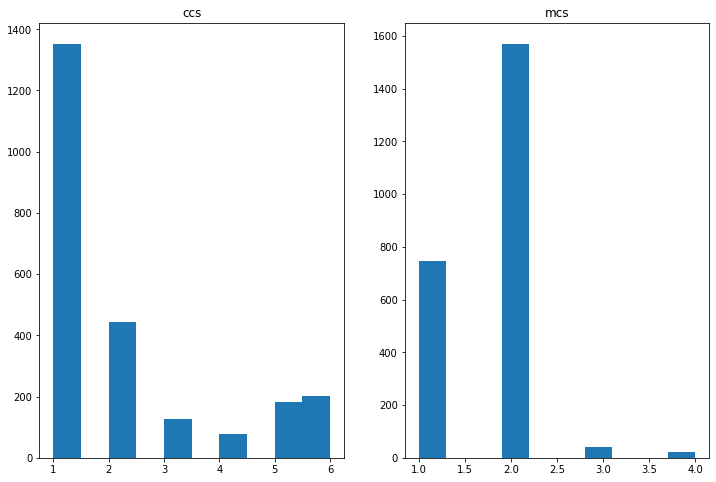

In [9]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.hist(df['ccs'])
plt.title('ccs')
plt.subplot(1,2,2)
plt.hist(df['mcs'])
plt.title('mcs')
plt.show()

(array([1444.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         937.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

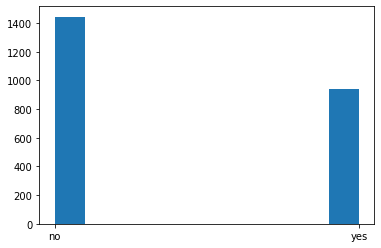

In [10]:
# to check how many single to buy a house
plt.hist(df['single'])


It seems like more married people to buy a house than single people but there are still a lot of single to buy a house.

In [11]:
df['comdominiom'].value_counts()


0    1695
1     686
Name: comdominiom, dtype: int64

0 means false and 1 means true. So there are 1695 are condos and rest are house.

In [12]:
df.corr()

,dir,hir,lvr,ccs,mcs,uria,comdominiom
dir,1.000000,0.781473,0.150653,0.065234,0.051318,0.046450,-0.012451
hir,0.781473,1.000000,0.126273,0.005277,0.104721,0.036992,-0.046039
lvr,0.150653,0.126273,1.000000,0.111939,0.186326,-0.034643,0.055001
ccs,0.065234,0.005277,0.111939,1.000000,0.152686,-0.006424,0.050742
mcs,0.051318,0.104721,0.186326,0.152686,1.000000,0.037077,0.090462
uria,0.046450,0.036992,-0.034643,-0.006424,0.037077,1.000000,-0.100647
comdominiom,-0.012451,-0.046039,0.055001,0.050742,0.090462,-0.100647,1.000000


<AxesSubplot:>

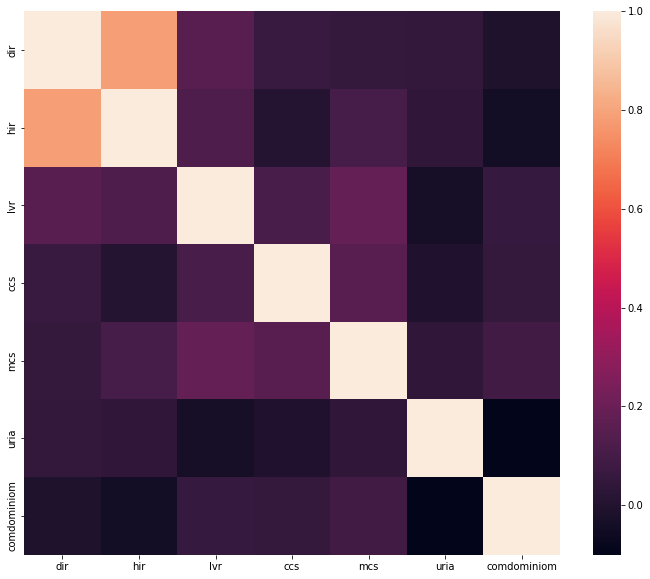

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

#### correlation
From the above, it seems only hir and dir have a strong relation between them rest are not that strong.

(array([2333.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          48.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

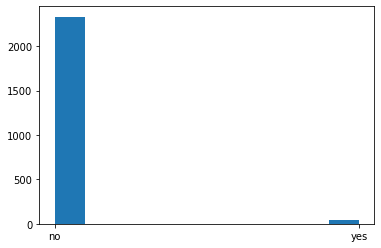

In [14]:
# to how many cases got denied

plt.hist(df['dmi'])

From the above, most people did not get denied.

(array([2.205e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.750e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

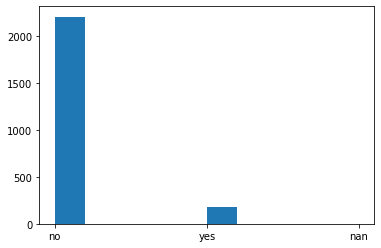

In [15]:
#
plt.hist(df['pbcr'].astype(str))


From the above, there is a nan value which need to replace.

### EDA Summary
There are not many missing values, but there are some missing. Each attribute does not have a strong relationship with other attributes. It seems if one attribute value gets increased, other wont decrease or increase. 

## Data Cleaning

In [16]:
# fill out the missing value by using ffill method.
df.fillna(method='ffill',inplace=True)

In [17]:
# check if there any miss value after fillna method.
df.isnull().sum()


dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

In [18]:
# check if there unknow answer in categorical data.
columns = ['pbcr', 'dmi', 'self', 'single', 'black', 'deny']

for val in columns:
    print(f'column name: {val} --- {df[val].unique()}')


column name: pbcr --- ['no' 'yes']
column name: dmi --- ['no' 'yes']
column name: self --- ['no' 'yes']
column name: single --- ['no' 'yes']
column name: black --- ['no' 'yes']
column name: deny --- ['no' 'yes']


In [19]:
# to shorten value range
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
scaled_dir = MinMaxScaler()
scaled_dir = scaled_dir.fit_transform(df['dir'].to_numpy().reshape(-1,1))


In [20]:
# normalization
scaled_ccs = MinMaxScaler()
scaled_ccs = scaled_ccs.fit_transform(df['ccs'].to_numpy().reshape(-1,1))
df['ccs'] = scaled_ccs

scaled_mcs = MinMaxScaler()
scaled_mcs = scaled_mcs.fit_transform(df['mcs'].to_numpy().reshape(-1,1))
df['mcs'] = scaled_mcs

scaled_uria = MinMaxScaler()
scaled_uria = scaled_uria.fit_transform(df['uria'].to_numpy().reshape(-1,1))
df['uria'] = scaled_uria

In [21]:
# hot encoding turn categorical data into numeric data 
'''
pbcr
dmi
single
black
deny
'''
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


new_df = df
categorical_col = ['pbcr','dmi','single','black','deny','self']

for col in categorical_col:
    col_ohe = pd.get_dummies(df[col],prefix=col)
    new_df = pd.concat((new_df,col_ohe),axis = 1).drop(col,axis = 1)

new_df.head()

,dir,hir,lvr,ccs,mcs,uria,comdominiom,pbcr_no,pbcr_yes,dmi_no,dmi_yes,single_no,single_yes,black_no,black_yes,deny_no,deny_yes,self_no,self_yes
0,0.221,0.221,0.800000,0.8,0.333333,0.238636,0,1,0,1,0,1,0,1,0,1,0,1,0
1,0.265,0.265,0.921875,0.2,0.333333,0.159091,0,1,0,1,0,0,1,1,0,1,0,1,0
2,0.372,0.248,0.920398,0.0,0.333333,0.159091,0,1,0,1,0,1,0,1,0,1,0,1,0
3,0.320,0.250,0.860465,0.0,0.333333,0.284091,0,1,0,1,0,1,0,1,0,1,0,1,0
4,0.360,0.350,0.600000,0.0,0.000000,0.159091,0,1,0,1,0,1,0,1,0,1,0,1,0


#### Rerun EDA

(array([1.353e+03, 4.410e+02, 1.000e+00, 0.000e+00, 1.260e+02, 0.000e+00,
        7.700e+01, 1.820e+02, 0.000e+00, 2.010e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

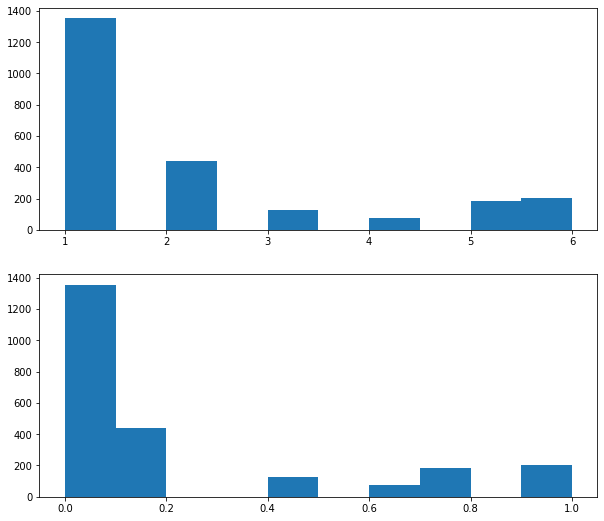

In [22]:
# to see two graph by using transformed data and original data
# feature ccs
plt.figure(figsize=(10,9))
plt.subplot(2,1,1)
plt.hist(df_cp['ccs'])
plt.subplot(2,1,2)
plt.hist(new_df['ccs'])


From the above, we see the range is shortened.

(array([7.470e+02, 0.000e+00, 1.000e+00, 1.571e+03, 0.000e+00, 0.000e+00,
        4.100e+01, 0.000e+00, 0.000e+00, 2.100e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

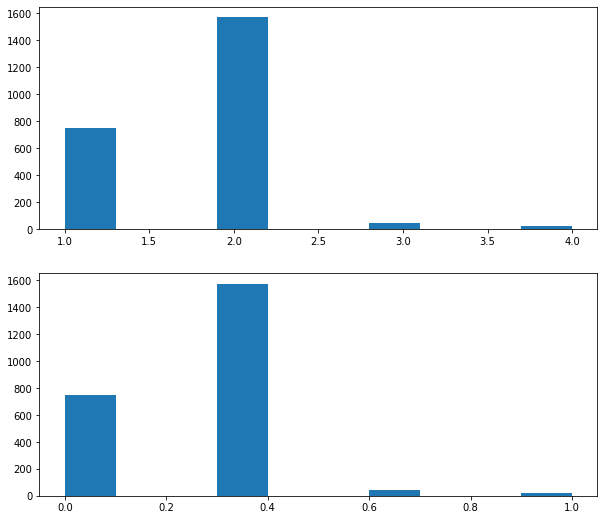

In [23]:
# to see mcs feature after transforming 
plt.figure(figsize=(10, 9))
plt.subplot(2, 1, 1)
plt.hist(df_cp['mcs'])
plt.subplot(2, 1, 2)
plt.hist(new_df['mcs'])


From the above, it shows that range is shortened.

(array([ 365., 1152.,  624.,   65.,    0.,    0.,    0.,    0.,   16.,
         159.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

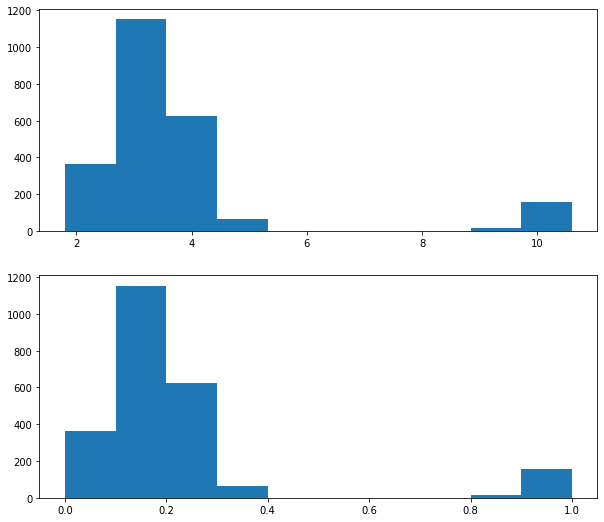

In [24]:

plt.figure(figsize=(10, 9))
plt.subplot(2, 1, 1)
plt.hist(df_cp['uria'])
plt.subplot(2, 1, 2)
plt.hist(new_df['uria'])


From the above, it shows the range is shortened. So it will fit into machine model.

### Feature Selection

In [25]:
# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

target = new_df['deny_no']
features = new_df.drop(['deny_no', 'deny_yes'], axis=1).copy()
features_name = list(features.columns)

select_kbest = SelectKBest(f_regression,k =  5).fit(features,target)

features_kbest = select_kbest.get_support()

print('Overall features: ',new_df.columns,'\n')
print('chosen feawtures: ', features.columns[features_kbest],'\n')

select_kbest.scores_


Overall features:  Index(['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom', 'pbcr_no',
       'pbcr_yes', 'dmi_no', 'dmi_yes', 'single_no', 'single_yes', 'black_no',
       'black_yes', 'deny_no', 'deny_yes', 'self_no', 'self_yes'],
      dtype='object') 

chosen feawtures:  Index(['ccs', 'pbcr_no', 'pbcr_yes', 'dmi_no', 'dmi_yes'], dtype='object') 



array([ 98.44180896,  42.88743288,  64.31953539, 175.85967302,
        28.94913233,   4.52958742,   3.75069692, 191.52316913,
       191.52316913, 336.81573745, 336.81573745,  13.96378611,
        13.96378611, 104.58732528, 104.58732528,   6.40773209,
         6.40773209])

In [26]:
scores = pd.DataFrame({'Feature Name':features.columns,'Score':select_kbest.scores_}).sort_values(by='Score',ascending=False)
print(scores)

   Feature Name       Score
10      dmi_yes  336.815737
9        dmi_no  336.815737
8      pbcr_yes  191.523169
7       pbcr_no  191.523169
3           ccs  175.859673
14    black_yes  104.587325
13     black_no  104.587325
0           dir   98.441809
2           lvr   64.319535
1           hir   42.887433
4           mcs   28.949132
12   single_yes   13.963786
11    single_no   13.963786
16     self_yes    6.407732
15      self_no    6.407732
5          uria    4.529587
6   comdominiom    3.750697


In [27]:
chosen_col = pd.DataFrame({'Chosen':features.columns[features_kbest]})
print(chosen_col)

     Chosen
0       ccs
1   pbcr_no
2  pbcr_yes
3    dmi_no
4   dmi_yes


In [28]:
# rfe selection
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lr = LinearRegression()

rfe = RFE(estimator= lr, n_features_to_select= 5, step = 1)
rfe.fit(features, target)

ref_features = features.columns[rfe.support_]
print(ref_features)


Index(['dmi_no', 'dmi_yes', 'single_yes', 'self_no', 'self_yes'], dtype='object')


In [29]:
rfe_output = pd.DataFrame({'Features':features.columns,'Rank':rfe.ranking_}).sort_values(by = 'Rank')
print(rfe_output)

       Features  Rank
16     self_yes     1
12   single_yes     1
10      dmi_yes     1
9        dmi_no     1
15      self_no     1
11    single_no     2
13     black_no     3
14    black_yes     4
7       pbcr_no     5
8      pbcr_yes     6
0           dir     7
3           ccs     8
2           lvr     9
4           mcs    10
1           hir    11
5          uria    12
6   comdominiom    13


In [30]:
from mlxtend.feature_selection import SequentialFeatureSelector

# target = new_df['deny_no']
# features = new_df.drop('deny_no',axis=1).copy()
feature_name = list(features.columns)

feature_selector = SequentialFeatureSelector(LinearRegression(),k_features= 5,forward=False,scoring = 'neg_mean_squared_error',cv =4)
feature_filtered = feature_selector.fit(features.values,target.values)

backward_features = list(feature_filtered.k_feature_names_)
print(backward_features)

original_features = pd.DataFrame({'Features':features.columns})
print(original_features)

['0', '3', '7', '10', '13']
       Features
0           dir
1           hir
2           lvr
3           ccs
4           mcs
5          uria
6   comdominiom
7       pbcr_no
8      pbcr_yes
9        dmi_no
10      dmi_yes
11    single_no
12   single_yes
13     black_no
14    black_yes
15      self_no
16     self_yes


In [31]:
# get a list of the actual names
backward_df = []



backward_df.append(original_features['Features'].loc[0])
backward_df.append(original_features['Features'].loc[9])
backward_df.append(original_features['Features'].loc[13])
backward_df.append(original_features['Features'].loc[15])
backward_df.append(original_features['Features'].loc[16])
backward_df = pd.DataFrame({'Backward':backward_df})
print(backward_df)


   Backward
0       dir
1    dmi_no
2  black_no
3   self_no
4  self_yes


In [32]:
# get all the different tables of chosen options
univariate_df = pd.DataFrame({'Univariate':features.columns[features_kbest]})
rfe_df = pd.DataFrame({'RFE':rfe_output['Features'].head(5).values})
selected = [univariate_df,rfe_df,backward_df]
final_df = pd.concat(selected,axis = 1)
print(final_df)

  Univariate         RFE  Backward
0        ccs    self_yes       dir
1    pbcr_no  single_yes    dmi_no
2   pbcr_yes     dmi_yes  black_no
3     dmi_no      dmi_no   self_no
4    dmi_yes     self_no  self_yes


Use three feature selection methods to pick 5 different features that matter to approve a mortgage. It shows different feature selection techniques pick different features. However, dmi feature exists in all three techniques.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def score(name,X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
    le = LinearRegression(normalize= True).fit(X_train,y_train)
    print(name)
    print('Training score:\t',le.score(X_train,y_train))

    y_pred= le.predict(X_test)
    print('r2_score:\t',r2_score(y_test,y_pred))
    

In [34]:
# print out train score
for k in final_df.columns:
    score(k,features[final_df[k].values],target)
    print()

Univariate
Training score:	 0.2163236619176644
r2_score:	 0.2153554819272363

RFE
Training score:	 0.14214929113505081
r2_score:	 0.09224395416036235

Backward
Training score:	 0.19021074539667282
r2_score:	 0.17652489601769672



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the p

Use linear regression model to train data and found out the score and coe score. Select k best feature method gives the best train score and coefficient score. It makes sense because it picks 5 features with the highest score. Those features that select k best method pick makes sense because those features are important to getting a mortgage.

In [35]:
# create ols model
import statsmodels.api as sm

y = new_df['deny_no'].copy()
X = new_df.drop(['deny_no', 'deny_yes'], axis=1)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                deny_no   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     69.80
Date:                Mon, 20 Jun 2022   Prob (F-statistic):          4.43e-146
Time:                        18:05:11   Log-Likelihood:                -338.97
No. Observations:                2381   AIC:                             703.9
Df Residuals:                    2368   BIC:                             779.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
dir            -0.4624      0.087     -5.299      

In [36]:
# create linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X,y)
r_sq = lin_reg.score(X,y)
print(r_sq)

0.2612674866460869


In [37]:
# create logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X,y)
model.score(X,y)

0.9042419151616967

In [41]:
# evaluate the model by splitting into train and test sets
# from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train,y_train)
predicted = model2.predict(X_test)
# print(predicted)
probs = model2.predict_proba(X_test)
print(probs)


[[0.04350565 0.95649435]
 [0.44496799 0.55503201]
 [0.05041527 0.94958473]
 ...
 [0.0808386  0.9191614 ]
 [0.039846   0.960154  ]
 [0.082255   0.917745  ]]


In [42]:
#generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))


0.9146853146853147
0.8353634264787835


In [43]:

print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))


[[ 24  55]
 [  6 630]]
              precision    recall  f1-score   support

           0       0.80      0.30      0.44        79
           1       0.92      0.99      0.95       636

    accuracy                           0.91       715
   macro avg       0.86      0.65      0.70       715
weighted avg       0.91      0.91      0.90       715



### Select Models
I am selecting a model based on the accuracy that the model gives. It pretty simple and straightforward approach.

LogisticRegression seems a good model because it gives good accuracy and when doing some validation, it also gives pretty good accuracy.

I did some subtests on this. It also gives me the same accuracy overall. so logistic regression is pretty good in this case.

## Conclusion
In this dataset, the most important features are ccs,pbcr, and dmi because those features determine if a person gets mortgage or not. Each feature is not related, most are independent features. If one feature's value is increased other features will not increase or decrease.b logistic regression model is best fit for this data set because it gives higher accuracy over other models.